# PCA (Principal Component Analysis)

This notebook shows how to plot a PCA with sciki-learn and statsmodels, with or without normalization.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

More about [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis): [Implementing a Principal Component Analysis (PCA) in Python step by step](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html).

## Download data

In [4]:
import pyensae
pyensae.download_data("auto-mpg.data", url="https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/")

'auto-mpg.data'

In [5]:
import pandas
df = pandas.read_fwf("auto-mpg.data", encoding="utf-8",
                    names="mpg cylinders displacement horsepower weight acceleration year origin name".split())
df["name"] = df["name"].apply(lambda s : s.strip(' "'))
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [6]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

We remove missing values:

In [7]:
df[df.horsepower == "?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [8]:
final = df[df.horsepower != '?'].copy()
final["horsepower"] = final["horsepower"].astype(float)

In [9]:
final.to_csv("auto-mpg.data.csv", sep="\t", index=False, encoding="utf-8")

In [10]:
final.shape

(392, 9)

## PCA with scikit-learn

In [11]:
from sklearn.decomposition import PCA
X = final[df.columns[1:-1]]
Y = final["mpg"]
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
out = pca.transform(X)
out[:5]

array([[ 536.44492922,   50.83312832],
       [ 730.34140206,   79.13543921],
       [ 470.9815846 ,   75.4476722 ],
       [ 466.40143367,   62.53420646],
       [ 481.66788465,   55.78036021]])

In [13]:
pca.explained_variance_ratio_, pca.noise_variance_

(array([ 0.99756151,  0.0020628 ]), 55.007194143657713)

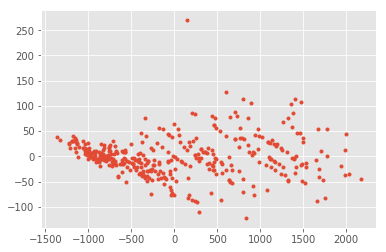

In [14]:
import matplotlib.pyplot as plt
plt.plot(out[:,0], out[:,1], ".")

In [15]:
pca.components_ 

array([[  1.79262233e-03,   1.14341275e-01,   3.89670355e-02,
          9.92673415e-01,  -1.35283460e-03,  -1.33684138e-03,
         -5.51538021e-04],
       [  1.33244815e-02,   9.45778439e-01,   2.98248416e-01,
         -1.20752748e-01,  -3.48258394e-02,  -2.38516836e-02,
         -3.24298106e-03]])

## PCA with scikit-learn and normalization

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline

normpca = Pipeline([('norm', Normalizer()), ('pca', PCA(n_components=2))])
normpca.fit(X)

Pipeline(steps=[('norm', Normalizer(copy=True, norm='l2')), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [17]:
out = normpca.transform(X)
out[:5]

array([[ 0.02731781,  0.00012872],
       [ 0.03511968,  0.00666259],
       [ 0.03247168,  0.00632048],
       [ 0.0287677 ,  0.0060517 ],
       [ 0.02758449,  0.00325874]])

In [18]:
normpca.named_steps['pca'].explained_variance_ratio_, normpca.named_steps['pca'].noise_variance_

(array([ 0.86819249,  0.08034075]), 4.3215551478843976e-06)

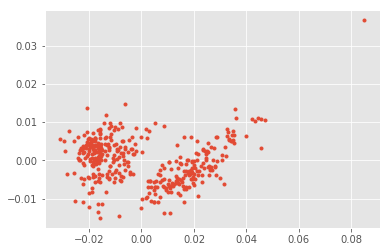

In [19]:
import matplotlib.pyplot as plt
plt.plot(out[:,0], out[:,1], ".")

In [20]:
normpca.named_steps['pca'].components_

array([[ 0.00415209,  0.92648229,  0.11272098, -0.05732771, -0.09162071,
        -0.34198745, -0.01646403],
       [ 0.01671457,  0.0789351 ,  0.85881718, -0.06957932,  0.02998247,
         0.49941847,  0.02763848]])

## PCA with statsmodels

In [21]:
from statsmodels.sandbox.tools import pca
xred, fact, eva, eve = pca(X, keepdim=2, normalize=False)

In [22]:
fact[:5]

array([[ 536.44492922,  -50.83312832],
       [ 730.34140206,  -79.13543921],
       [ 470.9815846 ,  -75.4476722 ],
       [ 466.40143367,  -62.53420646],
       [ 481.66788465,  -55.78036021]])

In [23]:
eva

array([ 732151.6743476 ,    1513.97202164])

In [24]:
eve

array([[  1.79262233e-03,  -1.33244815e-02],
       [  1.14341275e-01,  -9.45778439e-01],
       [  3.89670355e-02,  -2.98248416e-01],
       [  9.92673415e-01,   1.20752748e-01],
       [ -1.35283460e-03,   3.48258394e-02],
       [ -1.33684138e-03,   2.38516836e-02],
       [ -5.51538021e-04,   3.24298106e-03]])

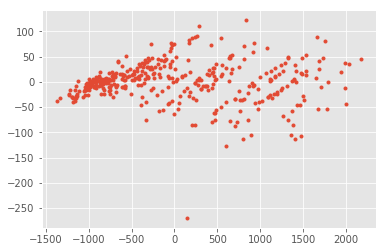

In [25]:
plt.plot(fact[:,0], fact[:,1], ".")

## PCA with statsmodels and normalization

In [26]:
from statsmodels.sandbox.tools import pca
from sklearn.preprocessing import normalize
X_norm = normalize(X)
xred, fact, eva, eve = pca(X_norm, keepdim=2, normalize=True)

In [27]:
eva

array([  3.65433661e-04,   3.38164814e-05])

In [28]:
eve

array([[  -0.21720145,    2.87429329],
       [ -48.46551687,   13.57394009],
       [  -5.89658384,  147.68504393],
       [   2.99888854,  -11.96508998],
       [   4.79280102,    5.15588534],
       [  17.88981698,   85.8816515 ],
       [   0.86125514,    4.75280519]])

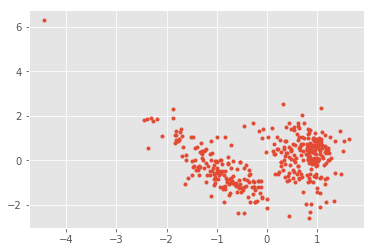

In [29]:
plt.plot(fact[:,0], fact[:,1], ".")